In [1]:
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_curve, auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats
from scipy import stats
%matplotlib inline
matplotlib.rc('font',family = 'Malgun Gothic')
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import statsmodels.api as sm
import random

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [5]:
df_raw = pd.read_csv("Dataset_all.csv")
df_raw.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
accuracy_test=[]
precision=[]
recall=[]
F1=[]

In [7]:
# 더미 변수화
df_raw[['Ox_Chamber']]=df_raw[['Ox_Chamber']].astype(str)
df_raw[['photo_soft_Chamber']]=df_raw[['photo_soft_Chamber']].astype(str)
df_raw[['lithography_Chamber']]=df_raw[['lithography_Chamber']].astype(str)
df_raw[['Etching_Chamber']]=df_raw[['Etching_Chamber']].astype(str)
df_raw[['Chamber_Num']]=df_raw[['Chamber_Num']].astype(str)
df_raw[['Wavelength']]=df_raw[['Wavelength']].astype(str)

# wet, dry 구분
# df_raw.loc[df_raw['type']=='dry','type']=0
# df_raw.loc[df_raw['type']=='wet','type']=1

# Vapor / H2O, O2 구분
df_raw.loc[df_raw['Vapor']=='H2O','Vapor']=0
df_raw.loc[df_raw['Vapor']=='O2','Vapor']=1

# Wavelength 365, 405, 436
df_raw.loc[df_raw['Wavelength']=='365','Wavelength']=0
df_raw.loc[df_raw['Wavelength']=='405','Wavelength']=1
df_raw.loc[df_raw['Wavelength']=='436','Wavelength']=2


# 필요 없는 변수 material, current, lamp, chamber, type제거
# df_list_before=['Temp_OXid', 'Vapor', 'ppm','Pressure', 'Oxid_time', 'thickness',
#         'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS','temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3','photoresist_bake', 'temp_softbake', 'time_softbake',
#         'Line_CD','Wavelength', 'Resolution', 'Energy_Exposure',
#         'Thin F4','Thin F2','Thin F3','Thin F1', 'Temp_Etching','Source_Power', 'Selectivity',
#         'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s','Flux840s', 'input_Energy', 'Temp_implantation','Furance_Temp', 'RTA_Temp']

# df_dummy=pd.get_dummies(df_raw[df_list_before])

# # 불량판단 기준 달라질 것. 이 파라미터에 따른 성능 생각할 필요
# Y_wet.loc[Y_wet.Target<183]=0
# Y_wet.loc[Y_wet.Target>=183]=1
# Y_dry.loc[Y_dry.Target<183]=0
# Y_dry.loc[Y_dry.Target>=183]=1
# len(X),len(Y)
# df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(X,Y,test_size = 0.3,random_state = 1234)

In [8]:
df_raw.loc[df_raw.Target>=183,'Quality']=1
df_raw.loc[df_raw.Target<183,'Quality']=0

In [9]:
# 제일 좋은 것 같은데
imp_features=['Temp_OXid', 'Thin F4', 'Thin F2', 'Flux480s', 'Source_Power',
        'thickness', 'Pressure', 'Energy_Exposure',
       'photoresist_bake', 'spin2', 'temp_HMDS_bake','Temp_implantation']
df_dummy=pd.get_dummies(df_raw[imp_features])
# ppm 제거

In [10]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_dummy,df_raw['Quality'],test_size = 0.3,random_state = 1234)

In [11]:
df_test_x_1 = df_test_x.copy()

In [12]:
range_1 = [] #Temp_Oxid
range_2 = [] #Pressure
range_3 = [] #temp_HMDS_bake
range_4 = [] #photoresist_bake
range_5 = [] #spin2
range_6 = [] #Temp_implantation
range_7 = []

In [13]:
for i in range(1, 250):
    range_1.append(random.uniform(1282.139,1310.709))
    range_2.append(random.uniform(0.180,0.193))
    range_3.append(random.uniform(207.765,209.521))
    range_4.append(random.uniform(1282.139,1310.709))
    range_5.append(random.uniform(4105.862,4208.676))
    range_6.append(random.uniform(97.744,100.22))
    range_7.append(random.uniform(13,220))
df_test_x_1['Temp_OXid']=range_1
df_test_x_1['Pressure']=range_2
df_test_x_1['temp_HMDS_bake']=range_3
df_test_x_1['photoresist_bake']=range_4
df_test_x_1['spin2']=range_5
df_test_x_1['Temp_implantation']=range_6
df_test_x_1['Thin F4']=range_7
# X_train, Y_train = smote.fit_resample(df_train_x, df_train_y)
# X_test, Y_test = smote.fit_resample(df_test_x, df_test_y)
# X_test_1, Y_test_1 = smote.fit_resample(df_test_x_1, df_test_y)

In [14]:
smote = SMOTE(random_state=0)

In [15]:
X_train, Y_train = smote.fit_resample(df_train_x, df_train_y) # 기존 학습 데이터 oversampling
X_test, Y_test = smote.fit_resample(df_test_x, df_test_y) # 기존 테스트 데이터 oversampling
X_test_1, Y_test_1 = smote.fit_resample(df_test_x_1, df_test_y) # 최적구간의 테스트 데이터 oversampling

In [16]:
# for i in range(1, 250):
#     range_1.append(random.normal(1282.139,1310.709))
#     range_2.append(random.normal(0.180,0.193))
#     range_3.append(random.normal(207.765,209.521))
#     range_4.append(random.normal(1282.139,1310.709))
#     range_5.append(random.normal(4105.862,4208.676))
#     range_6.append(random.normal(97.744,100.22))
#     range_7.append(random.normal(13,220))

In [17]:
# Temp_OXid','Pressure','temp_HMDS_bake','photoresist_bake','spin2','Temp_implantation'
df_test_x_1['Temp_OXid']=range_1
df_test_x_1['Pressure']=range_2
df_test_x_1['temp_HMDS_bake']=range_3
df_test_x_1['photoresist_bake']=range_4
df_test_x_1['spin2']=range_5
df_test_x_1['Temp_implantation']=range_6
df_test_x_1['Thin F4']=range_7

In [18]:
len(df_test_x)

249

In [19]:
len(df_test_x_1)

249

In [20]:
smote = SMOTE(random_state=0)

In [21]:
X_train, Y_train = smote.fit_resample(df_train_x, df_train_y)
X_test, Y_test = smote.fit_resample(df_test_x, df_test_y)
X_test_1, Y_test_1 = smote.fit_resample(df_test_x_1, df_test_y)

xgb = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [100,200,400,600],
    'learning_rate':[0.01,0.05,0.1,0.15,0.2],
    'max_depth':[4, 6, 8, 10, 12],
}
xgb_param_grid = GridSearchCV(xgb,param_grid = xgb_param_grid , scoring = 'accuracy', n_jobs = -1, verbose = 1)
xgb_param_grid.fit(df_train_x_wet, df_train_y_wet)

In [22]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncustomized = XGBClassifier(random_state=1234)
gb_uncustomized.fit(X_train, Y_train)
# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(gb_uncustomized.score (X_train, Y_train)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score (X_test, Y_test)))

[21:46:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on train set: 1.000
Accuracy on test set: 0.835


In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 10~150
para_n_tree = [n_tree * 2 for n_tree in range(1, 20)]

for v_n_estimators in para_n_tree:
    gb = XGBClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(X_train, Y_train)
    train_accuracy.append(gb.score(X_train, Y_train))
    test_accuracy.append(gb.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_n.round(3)

[21:46:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Estimators,TrainAccuracy,TestAccuracy
0,2,0.956,0.830
1,4,0.975,0.799
2,6,0.984,0.837
3,8,0.991,0.837
4,10,0.994,0.842
5,12,0.997,0.830
6,14,0.999,0.824
7,16,1.000,0.837
8,18,1.000,0.828
9,20,1.000,0.833


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


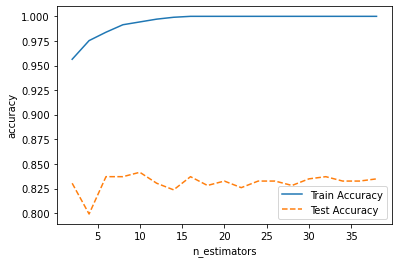

In [24]:
# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [25]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.05 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = XGBClassifier(learning_rate = v_learning_rate, n_estimators = 10, random_state = 1234)
    gb.fit(X_train, Y_train)
    train_accuracy.append(gb.score(X_train, Y_train))
    test_accuracy.append(gb.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

# LearningRate별 정확도 테이블
df_accuracy_lr.round(3)

[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,LearningRate,TrainAccuracy,TestAccuracy
0,0.05,0.967,0.795
1,0.10,0.977,0.837
2,0.15,0.988,0.830
3,0.20,0.989,0.839
4,0.25,0.994,0.839
5,0.30,0.994,0.842
6,0.35,0.997,0.819
7,0.40,0.998,0.835
8,0.45,1.000,0.828


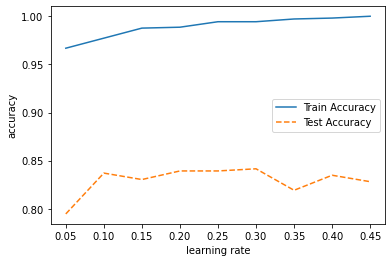

In [26]:
# LearningRate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 16)]

for v_max_depth in para_depth:
    gb = XGBClassifier(max_depth = v_max_depth,n_estimators = 10, learning_rate = 0.1,random_state=1234)
    gb.fit(X_train, Y_train)
    train_accuracy.append(gb.score(X_train, Y_train))
    test_accuracy.append(gb.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Depth,TrainAccuracy,TestAccuracy
0,1,0.826,0.768
1,2,0.873,0.808
2,3,0.932,0.857
3,4,0.954,0.871
4,5,0.966,0.868
5,6,0.977,0.837
6,7,0.984,0.824
7,8,0.985,0.817
8,9,0.990,0.804
9,10,0.987,0.792


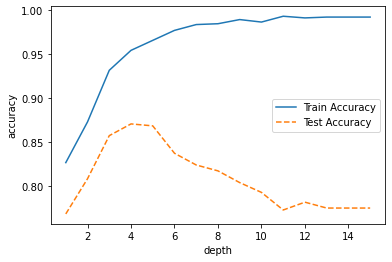

In [28]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

In [29]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 1 for n_leaf in range(1, 51)]

for v_min_samples_leaf in para_leaf:
    gb = XGBClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth = 4, n_estimators = 10, learning_rate = 0.1, random_state=1234)
    gb.fit(X_train, Y_train)
    train_accuracy.append(gb.score(X_train, Y_train))
    test_accuracy.append(gb.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_leaf.round(3)

[21:46:51] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:51] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the d

[21:46:51] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:51] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the d

[21:46:52] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:52] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the d

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.954,0.871
1,2,0.954,0.871
2,3,0.954,0.871
3,4,0.954,0.871
4,5,0.954,0.871
5,6,0.954,0.871
6,7,0.954,0.871
7,8,0.954,0.871
8,9,0.954,0.871
9,10,0.954,0.871


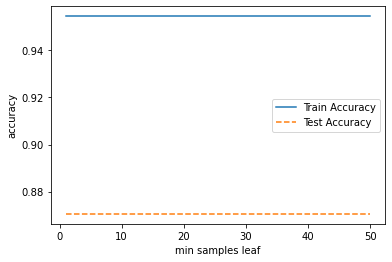

In [30]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = XGBClassifier(min_samples_split = v_min_samples_split,
                                    max_depth = 4,n_estimators = 10, learning_rate = 0.1, random_state=1234)
    gb.fit(X_train, Y_train)
    train_accuracy.append(gb.score(X_train, Y_train))
    test_accuracy.append(gb.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_split.round(3)

[21:46:52] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:52] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.954,0.871
1,20,0.954,0.871
2,30,0.954,0.871
3,40,0.954,0.871
4,50,0.954,0.871
5,60,0.954,0.871
6,70,0.954,0.871
7,80,0.954,0.871
8,90,0.954,0.871
9,100,0.954,0.871


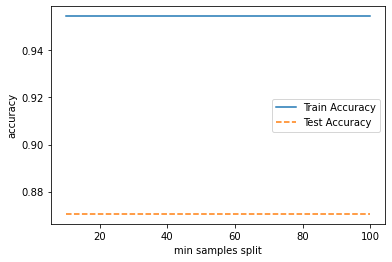

In [32]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [33]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_iter = [n_iter * 1000 for n_iter in range(1, 11)]

for v_num_iterations in para_iter:
    gb = XGBClassifier(max_depth = 4,n_estimators = 10, learning_rate = 0.1, random_state=1234, num_iterations = v_num_iterations )
    gb.fit(X_train, Y_train)
    train_accuracy.append(gb.score(X_train, Y_train))
    test_accuracy.append(gb.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["num_iterations"] = para_iter
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_split.round(3)

[21:46:52] WARNING: ../src/learner.cc:541: 
Parameters: { num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:52] WARNING: ../src/learner.cc:541: 
Parameters: { num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the defau

,num_iterations,TrainAccuracy,TestAccuracy
0,1000,0.954,0.871
1,2000,0.954,0.871
2,3000,0.954,0.871
3,4000,0.954,0.871
4,5000,0.954,0.871
5,6000,0.954,0.871
6,7000,0.954,0.871
7,8000,0.954,0.871
8,9000,0.954,0.871
9,10000,0.954,0.871


In [34]:
# 최종 모델
gb_final = XGBClassifier( max_depth = 4, n_estimators = 10,
                                      learning_rate = 0.1, random_state=1234)
evals = [(X_test, Y_test)]
gb_final.fit(X_train,Y_train,early_stopping_rounds = 500, eval_metric = 'logloss',
             eval_set = evals,verbose = 1)
# 예측
y_pred = gb_final.predict(X_test)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(X_train, Y_train)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(X_test, Y_test)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_pred)))

[0]	validation_0-logloss:0.64299
[1]	validation_0-logloss:0.60229
[2]	validation_0-logloss:0.57072
[3]	validation_0-logloss:0.53387
[4]	validation_0-logloss:0.50116
[5]	validation_0-logloss:0.47442
[6]	validation_0-logloss:0.45368
[7]	validation_0-logloss:0.43317
[8]	validation_0-logloss:0.43413
[9]	validation_0-logloss:0.42034
Accuracy on training set: 0.954
Accuracy on test set: 0.871

Confusion matrix: 
[[190  34]
 [ 24 200]]


In [35]:
f1_score(Y_test,y_pred)

0.8733624454148471

In [36]:
# 변수명
v_feature_names = X_train.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장    gb = XGBClassifier(n_estimators = v_n_estimators, random_state = 1234)

df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
1,Thin F4,0.386
4,Source_Power,0.131
2,Thin F2,0.109
5,thickness,0.075
6,Pressure,0.075
8,photoresist_bake,0.054
0,Temp_OXid,0.047
3,Flux480s,0.046
11,Temp_implantation,0.034
9,spin2,0.033


Text(0, 0.5, '설명변수')

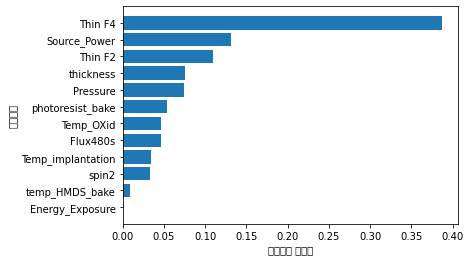

In [37]:
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

dtrain = xgb.DMatrix(data=df_train_x_wet, label = df_train_y_wet)
dtest = xgb.DMatrix(data=df_test_x_wet, label=df_test_y_wet)
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

그리드 서치

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [39]:
model_pipe = Pipeline( [ ('scaler', RobustScaler()),
            ('model', XGBClassifier(max_depth =4, n_estimators = 10, learning_rate = 0.1, random_state = 1234 ) )] )
model_pipe.fit(X_train,Y_train)

[21:46:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=8, num_parallel_tree=1, random_state=1234,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [40]:
para_sample = [sample * 0.1 for sample in range(1, 11)]
param_grid1 = {'model__booster':['gbtree'],
             'model__subsample':para_sample,
             'model__process_type':['default', 'update'],
             'model__objective':['binary:logistic'],
              'model__scale_pos_weight':[1, 1.1,1.2,1.3,1.4,1.5]}

In [41]:
# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator= model_pipe,
                       param_grid=param_grid1,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

hr_grid.fit(X_train, Y_train)

[21:47:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=4,
                                                      

In [42]:
best_model = hr_grid.best_estimator_

In [43]:
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=8, num_parallel_tree=1,
                               process_type='default', random_state=1234,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.4, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [44]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [45]:
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_test_pred)))

Confusion matrix: 
[[186  38]
 [ 24 200]]


In [46]:
print(accuracy_score(Y_test, y_test_pred))
print(precision_score(Y_test, y_test_pred))
print(recall_score(Y_test, y_test_pred))
print(f1_score(Y_test, y_test_pred))

0.8616071428571429
0.8403361344537815
0.8928571428571429
0.8658008658008658


In [47]:
y_test_pred1 = best_model.predict(df_test_x_1)

In [48]:
y_test_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [49]:
np.array(df_test_y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [50]:
df_test_y.sum() / len(df_test_y)

0.10040160642570281

In [51]:
y_test_pred2 = best_model.predict(X_test_1)

In [52]:
len(y_test_pred2)

448

In [53]:
Y_test.sum()/ len(Y_test)

0.5

In [54]:
y_test_pred1 = best_model.predict(df_test_x_1)
# print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_test_pred1)))

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       527
           1       0.92      0.99      0.95       527

    accuracy                           0.95      1054
   macro avg       0.95      0.95      0.95      1054
weighted avg       0.95      0.95      0.95      1054



In [57]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       224
           1       0.84      0.89      0.87       224

    accuracy                           0.86       448
   macro avg       0.86      0.86      0.86       448
weighted avg       0.86      0.86      0.86       448



의사나무결정

In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 21)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 1234)
    tree.fit(X_train, Y_train)
    train_accuracy.append(tree.score(X_train, Y_train))
    test_accuracy.append(tree.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.824,0.770
1,2,0.868,0.806
2,3,0.871,0.810
3,4,0.927,0.844
4,5,0.946,0.647
5,6,0.963,0.786
6,7,0.977,0.694
7,8,0.984,0.768
8,9,0.986,0.768
9,10,0.987,0.768


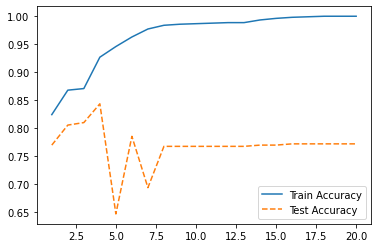

In [59]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [60]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 21)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth = 8,random_state=1234)
    tree.fit(X_train, Y_train)
    train_accuracy.append(tree.score(X_train, Y_train))
    test_accuracy.append(tree.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.965,0.692
1,10,0.949,0.629
2,15,0.930,0.748
3,20,0.922,0.757
4,25,0.913,0.605
5,30,0.913,0.605
6,35,0.913,0.605
7,40,0.913,0.605
8,45,0.912,0.605
9,50,0.902,0.819


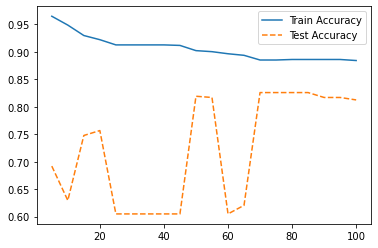

In [61]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 1 for n_split in range(2, 11)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 70, max_depth = 8, random_state=1234)
    tree.fit(X_train, Y_train)
    train_accuracy.append(tree.score(X_train, Y_train))
    test_accuracy.append(tree.score(X_test, Y_test))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.885,0.826
1,3,0.885,0.826
2,4,0.885,0.826
3,5,0.885,0.826
4,6,0.885,0.826
5,7,0.885,0.826
6,8,0.885,0.826
7,9,0.885,0.826
8,10,0.885,0.826


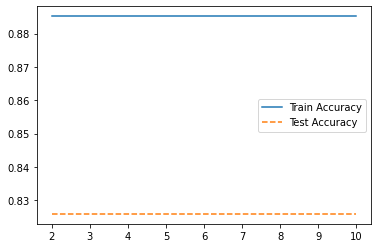

In [63]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [64]:
tree_final = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 70,random_state=1234)
tree_final.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=70, random_state=1234)

In [65]:
# 평가
y_pred = tree_final.predict(X_test)
print("Accuracy: {0:.3f}\n".format(tree_final.score(X_test, Y_test)))
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_pred)))

Accuracy: 0.826

Confusion matrix: 
[[169  55]
 [ 23 201]]


In [66]:
model_pipe = Pipeline( [ ('scaler', RobustScaler()),
            ('model', DecisionTreeClassifier(random_state = 1234, max_depth = 8, min_samples_leaf= 70) )] )
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=70,
                                        random_state=1234))])

In [67]:
para_split = [n_split * 20 for n_split in range(1, 11)]
param_grid = {
             'model__min_samples_split':para_split,
             }

In [68]:
# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator= model_pipe,
                       param_grid=param_grid,
                       scoring='roc_auc',
                       n_jobs=-1)

hr_grid.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=8,
                                                               min_samples_leaf=70,
                                                               random_state=1234))]),
             n_jobs=-1,
             param_grid={'model__min_samples_split': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200]},
             scoring='roc_auc')

In [69]:
best_model = hr_grid.best_estimator_

In [70]:
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=70,
                                        min_samples_split=20,
                                        random_state=1234))])

In [71]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [72]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       527
           1       0.84      0.95      0.89       527

    accuracy                           0.89      1054
   macro avg       0.89      0.89      0.88      1054
weighted avg       0.89      0.89      0.88      1054



In [73]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       224
           1       0.79      0.90      0.84       224

    accuracy                           0.83       448
   macro avg       0.83      0.83      0.82       448
weighted avg       0.83      0.83      0.82       448



랜덤포레스트

In [75]:
estimator = RandomForestClassifier(n_estimators = 100 , random_state = 1234)
param_grid = {"max_depth":para_depth,
             "min_samples_leaf":para_leaf}
grid_rf = GridSearchCV(estimator,param_grid, scoring = 'accuracy',n_jobs = -1)
grid_rf.fit(X_train, Y_train)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parametor:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=14, min_samples_leaf=5, random_state=1234)

best parametor:
{'max_depth': 14, 'min_samples_leaf': 5}

best score:
0.959


In [78]:
best_model_rf = grid_rf.best_estimator_

In [79]:
best_model_rf

RandomForestClassifier(max_depth=14, min_samples_leaf=5, random_state=1234)

In [80]:
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

In [81]:
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf= best_model_rf.predict(X_test)

In [82]:
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_test_pred_rf)))

Confusion matrix: 
[[205  19]
 [ 53 171]]


In [83]:
print(accuracy_score(Y_test, y_test_pred_rf))
print(precision_score(Y_test, y_test_pred_rf))
print(recall_score(Y_test, y_test_pred_rf))
print(f1_score(Y_test, y_test_pred_rf))

0.8392857142857143
0.9
0.7633928571428571
0.826086956521739
